In [33]:
## Imports
import sys
import os
import time
import math
import random
import pdb
import h5py

# Plotting import
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import pandas as pd

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)
    

# Import the utils for plotting the metrics
from plot_utils import plot_utils
from plot_utils import notebook_utils_2
from utils.plot_utils import get_plot_array
from sklearn.metrics import roc_curve, auc

In [7]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [51]:
def disp_learn_hist_smoothed(location, losslim=None, window_train=400,window_val=40,show=True):
    train_log=location+'/log_train.csv'
    val_log=location+'/log_val.csv'
    
    train_log_csv = pd.read_csv(train_log)
    val_log_csv  = pd.read_csv(val_log)

    epoch_train    = moving_average(np.array(train_log_csv.epoch),window_train)
    gloss_train = moving_average(np.array(train_log_csv.g_loss),window_train)
    dloss_train     = moving_average(np.array(train_log_csv.d_loss),window_train)
    
    epoch_val    = moving_average(np.array(val_log_csv.epoch),window_val)
    gloss_val = moving_average(np.array(val_log_csv.g_loss),window_val)
    dloss_val     = moving_average(np.array(val_log_csv.d_loss),window_val)

    epoch_val_uns    = np.array(val_log_csv.epoch)
    gloss_val_uns = np.array(val_log_csv.g_loss)
    dloss_val_uns     = np.array(val_log_csv.d_loss)
    #saved_best=np.array(val_log_csv.saved_best)
    #stored_indices=np.where(saved_best>1.0e-3)
    #epoch_val_st=epoch_val_uns[stored_indices]
    #accuracy_val_st=accuracy_val_uns[stored_indices]
    #loss_val_st=loss_val_uns[stored_indices]

    fig, ax1 = plt.subplots(figsize=(12,8),facecolor='w')
    line11 = ax1.plot(epoch_train, dloss_train, linewidth=2, label='Average training D loss', color='b', alpha=0.3)
    line12 = ax1.plot(epoch_val, dloss_val, label='Average validation D loss', color='blue')
    #line13 = ax1.scatter(epoch_val_st, loss_val_st, label='BEST validation loss',
                         #facecolors='none', edgecolors='blue',marker='o')
    
    ax1.set_xlabel('Epoch',fontweight='bold',fontsize=24,color='black')
    ax1.tick_params('x',colors='black',labelsize=18)
    ax1.set_ylabel('D Loss', fontsize=24, fontweight='bold',color='b')
    ax1.tick_params('y',colors='b',labelsize=18)
   
    '''
    if losslim is not None:
        ax1.set_ylim(0.,losslim)
    else:
        ax1.set_ylim(0.,1.5)
    '''
    
    ax2 = ax1.twinx()
    line21 = ax2.plot(epoch_train, gloss_train, linewidth=2, label='Average training G loss', color='r', alpha=0.3)
    line22 = ax2.plot(epoch_val, gloss_val, label='Average validation G loss', color='red')
    #line23 = ax2.scatter(epoch_val_st, accuracy_val_st, label='BEST accuracy',
                         #facecolors='none', edgecolors='red',marker='o')
    
    
    ax2.set_ylabel('G Loss', fontsize=24, fontweight='bold',color='r')
    ax2.tick_params('y',colors='r',labelsize=18)
    
    # added these four lines
    #lines  = line11+ line12+ [line13]+ line21+ line22+ [line23]
    lines  = line11+ line12+ line21+ line22
    #lines_sctr=[line13,line23]
    #lines=lines_plt+lines_sctr

    labels = [l.get_label() for l in lines]
    
    leg    = ax2.legend(lines, labels, fontsize=16, loc=5, numpoints=1)
    leg_frame = leg.get_frame()
    leg_frame.set_facecolor('white')

    if show:
        plt.grid()
        plt.show()
        return

    return fig

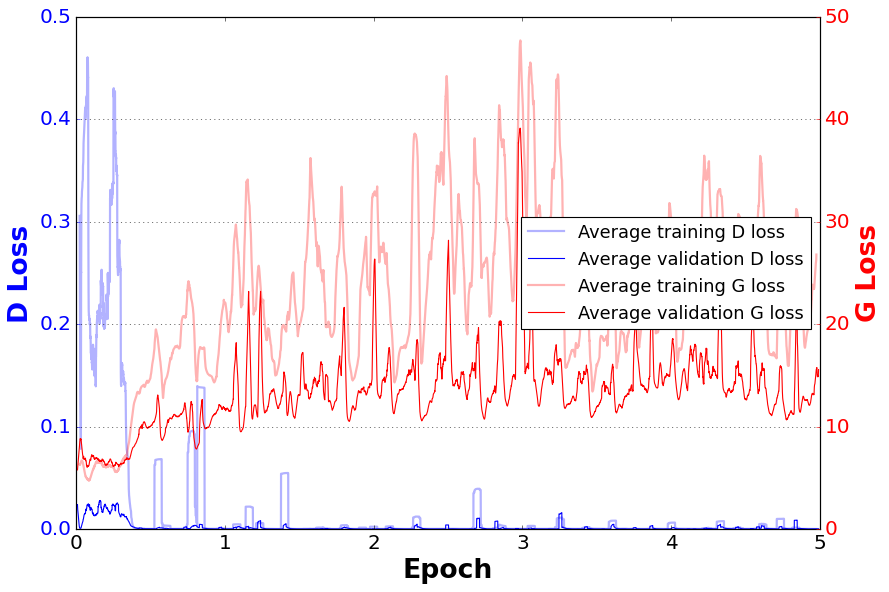

In [52]:
disp_learn_hist_smoothed('/home/cmacdonald/CNN/dumps/20200723_122054_first_gan')

In [11]:
f = np.load('/home/cmacdonald/CNN/dumps/20200723_122054_first_gan/test_validation_iteration_dump.npz',allow_pickle=True)

In [12]:
f.files

['events', 'labels', 'energies', 'gen_imgs', 'g_loss', 'd_loss']

In [24]:
images = np.moveaxis(f['gen_imgs'][0],1,-1)

In [46]:
fullevent_h5=h5py.File('/fast_scratch/WatChMaL/data/IWCDmPMT_4pi_fulltank_9M_splits_CNN/IWCDmPMT_4pi_fulltank_9M_trainval.h5','r')
example_event=fullevent_h5['event_data'][0]
fullevent_h5.close()

0.09077995867768596


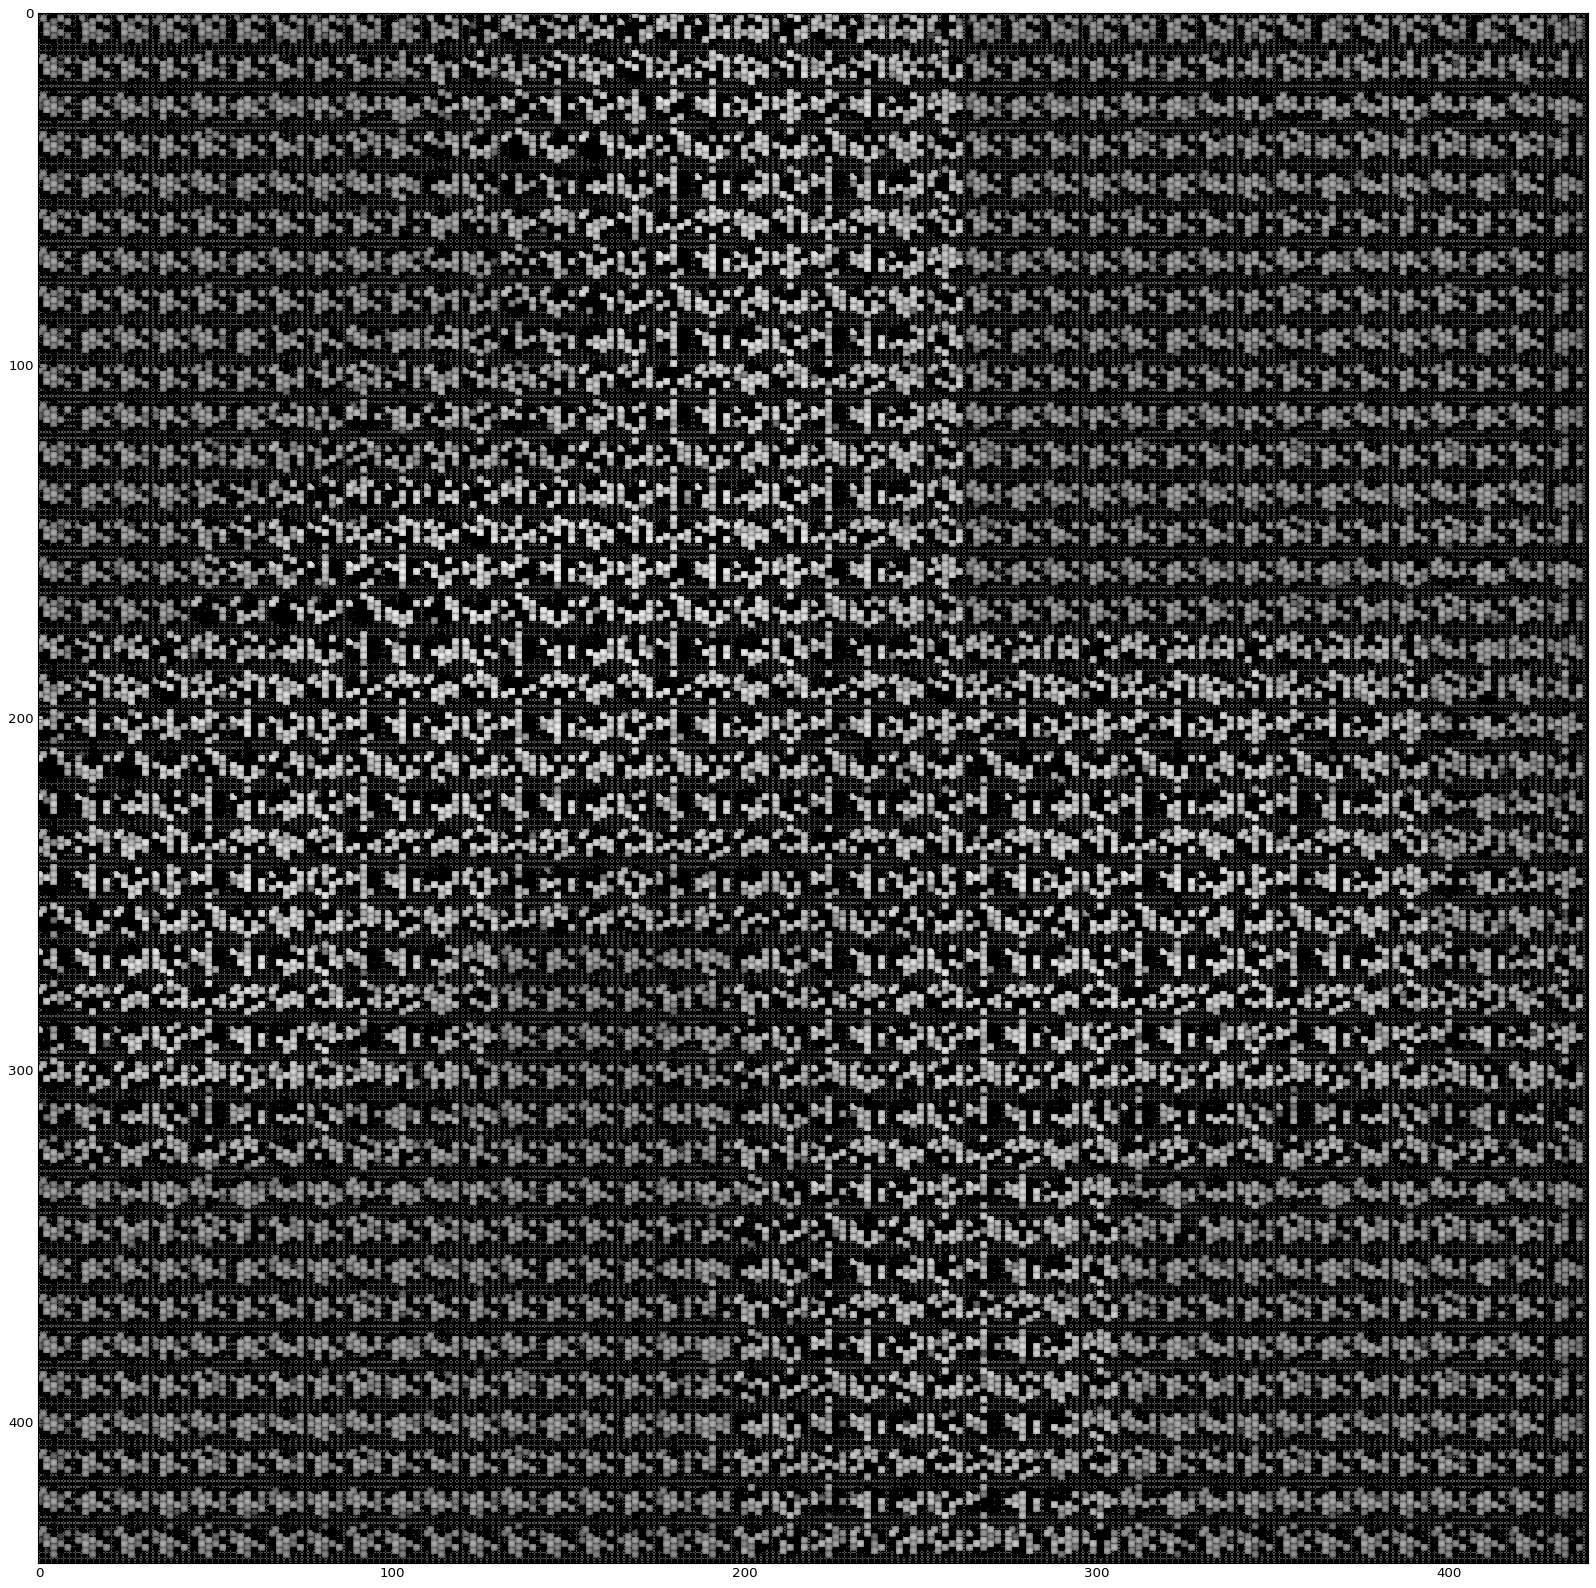

In [66]:
from utils.plot_utils import get_plot_array
fig, axes = plt.subplots(1,1,figsize=(25,25),facecolor='w')
cmap = plt.cm.gray
cmap.set_bad(color='black')
ax = axes
a=get_plot_array(images[0][:,:,:])
print(len(np.where(a>0)[0])/(440**2))
#     a = np.ma.masked_where(a < 0.05, a)
ax.imshow(a,
           origin="upper",
           cmap=cmap,
           norm=colors.LogNorm(vmax=np.amax(a),
                                         clip=True))
plt.show()